In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/IPSL-CM5A2-INCA_diag_2014(0319).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [59]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']
data['o3loss_mole'] = data['o3loss']

data['lossch4_mole'] = data['lossch4']*10**5*0.66
data['lossco_mole'] = data['lossco']
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [60]:
data['lossch4_mole'].mean()

209875.16157203846

In [61]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [62]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [63]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    972000.000000
mean        200.162632
std         481.105405
min           0.000000
25%          15.594763
50%          91.221510
75%         258.966298
max       20382.751941
Name: ratio_ch3o2_oh, dtype: float64

In [64]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    972000.000000
mean          0.441571
std           0.547994
min           0.000000
25%           0.104074
50%           0.271714
75%           0.603490
max           6.283293
Name: P2_frac, dtype: float64

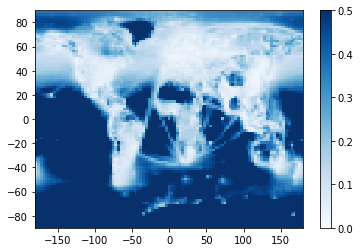

In [65]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [66]:
data_mean['P2_frac'].describe()

count    16200.000000
mean         0.441571
std          0.373415
min          0.017900
25%          0.148704
50%          0.357891
75%          0.606623
max          2.012384
Name: P2_frac, dtype: float64

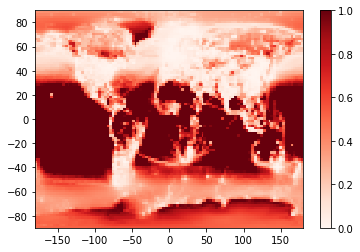

In [67]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [68]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    972000.000000
mean          0.175207
std           0.702254
min          -6.456840
25%          -0.107793
50%           0.298505
75%           0.635810
max           0.999637
Name: P3_frac, dtype: float64

In [69]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [70]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [71]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    9.720000e+05
mean              inf
std               NaN
min      1.231872e-02
25%      7.358377e-01
50%      1.380801e+00
75%      2.738819e+00
max               inf
Name: ratio_P1_P2, dtype: float64

In [72]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          1.013600
std           2.671234
min           0.017650
25%           0.154944
50%           0.253830
75%           0.593259
max          85.444453
Name: ratio_P5_P6, dtype: float64

In [73]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

KeyError: "['country_y'] not found in axis"

In [74]:
#data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/IPSL-CM5A2-INCA_diag_2014(0320).csv', index = False)

In [75]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [76]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.31
P2 fraction:    0.49
P3 fraction:    0.2
P5 fraction:    0.12
P6 fraction:    0.32
P1:P2 ratio:    1.8
P5:P6 ratio:    0.42
HO₂:OH ratio:   78.7
CH₃O₂:OH ratio: 26.2
